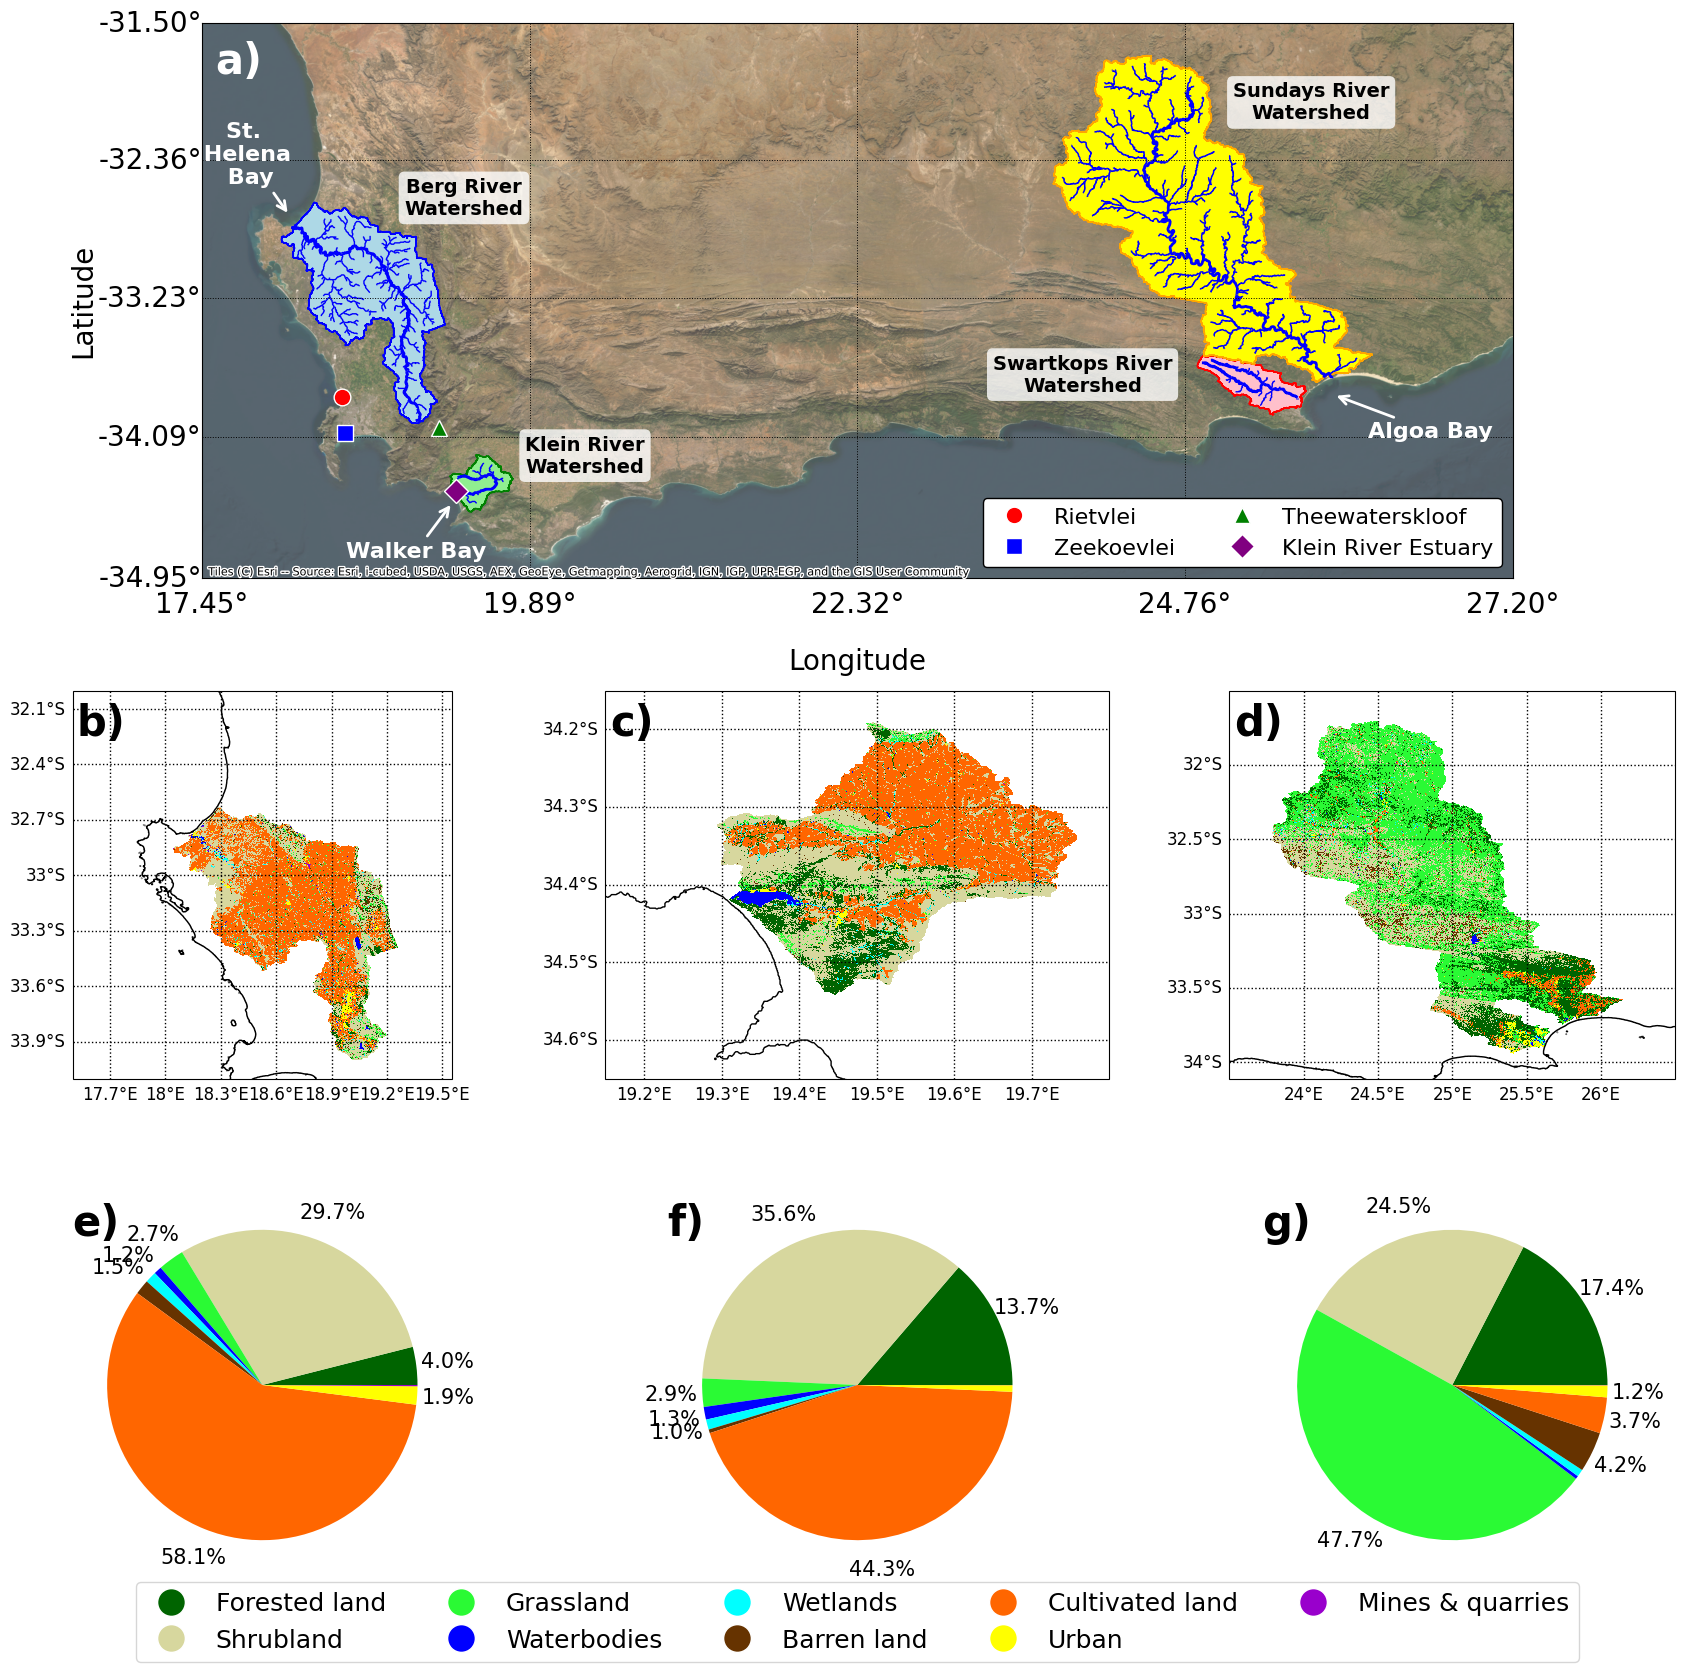

In [ ]:
#FIgure 1 V2



import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from pyproj import Transformer
import numpy as np
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
coastline = cfeature.GSHHSFeature(scale='full',levels=[1]) 
import pickle


# figure letter size
fls = 30


# Load and convert catchments to Web Mercator (EPSG:3857) for integration with ESRI basemap
berg_catchment = gpd.read_file('berg_river/catchment/berg30_catchment.shp').to_crs(epsg=3857)
klein_catchment = gpd.read_file('klein_river/catchment/klein30m_catchment.shp').to_crs(epsg=3857)
swartkops_catchment = gpd.read_file('swartkops_river/catchment/swartkops30m_catchment.shp').to_crs(epsg=3857)
sundays_catchment = gpd.read_file('sundays_river/catchment/sundays_catchment.shp').to_crs(epsg=3857)


# Set up the plot without a Cartopy projection
fig = plt.figure(figsize=(18, 16),tight_layout = True)



gs = gridspec.GridSpec(10, 3, figure=fig)  # Reduce wspace for horizontal spacing




lon_min, lon_max = 17.45, 27.2
lat_min, lat_max = -34.95, -31.5

# Convert these bounds to Web Mercator using pyproj
transformer = Transformer.from_crs("EPSG:4326", "EPSG:3857", always_xy=True)
x_min, y_min = transformer.transform(lon_min, lat_min)
x_max, y_max = transformer.transform(lon_max, lat_max)

ax = fig.add_subplot(gs[:4, :])

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

# Add the Esri basemap
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery, zoom=10,alpha = 0.7)

# Plot the catchment areas
berg_catchment.plot(ax=ax, edgecolor="blue", facecolor="lightblue", linewidth=1)
klein_catchment.plot(ax=ax, edgecolor="green", facecolor="lightgreen", linewidth=1)
swartkops_catchment.plot(ax=ax, edgecolor="red", facecolor="pink", linewidth=1)
sundays_catchment.plot(ax=ax, edgecolor="orange", facecolor="yellow", linewidth=1)


# Load river shapefile
swartkops_river_file = 'swartkops_river/mainstem/swartkops_main.shp'
swartkops_trib_file = 'swartkops_river/tributaries/swartkops_trib.shp'

sundays_river_file = 'sundays_river/mainstem/sundays_main.shp'
sundays_trib_file = 'sundays_river/tributaries/sundays_trib.shp'

berg_river_file = 'berg_river/mainstem/berg_main.shp'
berg_trib_file = 'berg_river/tributaries/berg_trib.shp'

klein_river_file = 'klein_river/mainstem/klein_mainstem.shp'
klein_trib_file = 'klein_river/tributaries/klein_trib.shp'

swartkops_river = gpd.read_file(swartkops_river_file).to_crs(epsg=3857)
swartkops_trib = gpd.read_file(swartkops_trib_file).to_crs(epsg=3857)

sundays_river = gpd.read_file(sundays_river_file).to_crs(epsg=3857)
sundays_trib = gpd.read_file(sundays_trib_file).to_crs(epsg=3857)

berg_river = gpd.read_file(berg_river_file).to_crs(epsg=3857)
berg_trib = gpd.read_file(berg_trib_file).to_crs(epsg=3857)

klein_river = gpd.read_file(klein_river_file).to_crs(epsg=3857)
klein_trib = gpd.read_file(klein_trib_file).to_crs(epsg=3857)

# Plot the river shapefile
swartkops_river.plot(ax=ax, color='blue', linewidth=2, label='Swartkops River')
swartkops_trib.plot(ax=ax, color='blue', linewidth=1, label='Swartkops Tributaries')

sundays_river.plot(ax=ax, color='blue', linewidth=2, label='Sundays River')
sundays_trib.plot(ax=ax, color='blue', linewidth=1, label='Sundays Tributaries')

berg_river.plot(ax=ax, color='blue', linewidth=2, label='Berg River')
berg_trib.plot(ax=ax, color='blue', linewidth=1, label='Berg Tributaries')

klein_river.plot(ax=ax, color='blue', linewidth=2, label='Klein River')
klein_trib.plot(ax=ax, color='blue', linewidth=1, label='Klein Tributaries')


lon_values = np.linspace(lon_min, lon_max, 10)
lat_values = np.linspace(lat_min, lat_max, 10)

# Convert lat/lon to Web Mercator
x_values, y_values = transformer.transform(lon_values, lat_values)


# Set the limits for the map extent
ax.set_xlim(transformer.transform(lon_min, lat_min)[0], transformer.transform(lon_max, lat_max)[0])
ax.set_ylim(transformer.transform(lon_min, lat_min)[1], transformer.transform(lon_max, lat_max)[1])

lon_values = np.linspace(lon_min, lon_max, 5)
lat_values = np.linspace(lat_min, lat_max, 5)

# Plot longitude gridlines (x-values) and add labels
for lon in lon_values:
    x, _ = transformer.transform(lon, lat_min)
    ax.axvline(x=x, color='black', linestyle=':', linewidth=0.7)
    ax.text(x, ax.get_ylim()[0]-10000, f"{lon:.2f}°", va='top', ha='center',fontsize=20, color='black')

# Plot latitude gridlines (y-values) and add labels
for lat in lat_values:
    _, y = transformer.transform(lon_min, lat)
    ax.axhline(y=y, color='black', linestyle=':', linewidth=0.7)
    ax.text(ax.get_xlim()[0], y-100, f"{lat:.2f}°", va='center', ha='right', fontsize=20, color='black')

ax.set_yticks([])
ax.set_xticks([])
# Set axis labels
ax.set_xlabel("Longitude",labelpad=50,fontsize = 20)
ax.set_ylabel("Latitude",labelpad=75,fontsize = 20)
ax.set_facecolor('white')


ax.text(0.01, 0.97, 'a)', transform=ax.transAxes, 
               ha='left', va='top', fontsize=fls, fontweight='bold',color = 'w')

# Add bay labels with arrows
bays = {
    "St. Helena Bay": (-32.708136, 18.100577),
    "Walker Bay": (-34.488724, 19.313296),
    "Algoa Bay": (-33.824983, 25.868311)
}

# Convert bay coordinates to Web Mercator
bay_points = {name: transformer.transform(lon, lat) for name, (lat, lon) in bays.items()}

# Add bay labels with arrows
for name, (x, y) in bay_points.items():
    # Adjust arrow positions for better placement
    if name == "St. Helena Bay":
        ax.annotate("St. \n Helena \n Bay", xy=(x, y), xytext=(x-35000, y+50000),
                   arrowprops=dict(arrowstyle="->", color='white', lw=2),
                   fontsize=16, color='white', weight='bold',
                   ha='center', va='center')
    elif name == "Walker Bay":
        ax.annotate(name, xy=(x, y), xytext=(x-30000, y-40000),
                   arrowprops=dict(arrowstyle="->", color='white', lw=2),
                   fontsize=16, color='white', weight='bold',
                   ha='center', va='center')
    elif name == "Algoa Bay":
        ax.annotate(name, xy=(x, y), xytext=(x+80000, y-30000),
                   arrowprops=dict(arrowstyle="->", color='white', lw=2),
                   fontsize=16, color='white', weight='bold',
                   ha='center', va='center')

# Add watershed labels
watersheds = {
    "Berg River\nWatershed": (-32.6, 19.4),
    "Klein River\nWatershed": (-34.2, 20.3),
    "Swartkops River\nWatershed": (-33.7, 24),
    "Sundays River\nWatershed": (-32, 25.7)
}

# Convert watershed coordinates to Web Mercator
watershed_points = {name: transformer.transform(lon, lat) for name, (lat, lon) in watersheds.items()}

# Add watershed labels
for name, (x, y) in watershed_points.items():
    ax.text(x, y, name, fontsize=14, color='black', weight='bold',
           ha='center', va='center', 
           bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8, edgecolor='none'))


locations = {
    "Rietvlei": (-33.838657, 18.491104),
    "Zeekoevlei": (-34.061910, 18.515117),
    "Theewaterskloof": (-34.032161, 19.213562),
    "Klein River Estuary": (-34.416488, 19.342300)
}

# Convert coordinates to Web Mercator
markers = {name: transformer.transform(lon, lat) for name, (lat, lon) in locations.items()}

# Define unique markers and colors
marker_symbols = ['o', 's', '^', 'D']  # circle, square, triangle, diamond
marker_colors = ['red', 'blue', 'green', 'purple']

# Plot each marker
for i, (name, (x, y)) in enumerate(markers.items()):
    ax.plot(x, y, marker=marker_symbols[i], color=marker_colors[i], 
            markersize=12, linestyle='none', markeredgecolor='white')

# Add legend
legend_elements = [plt.Line2D([0], [0], marker=marker_symbols[i], color='w', label=name,
                             markerfacecolor=marker_colors[i], markersize=12, markeredgecolor='white')
                  for i, name in enumerate(locations.keys())]

ax.legend(handles=legend_elements, loc='lower right', fontsize=16, 
          framealpha=1, facecolor='white', edgecolor='black',ncol=2)


#Berg river catchment====================================================
with open('landcover/berg_catchment_2022.pkl','rb') as f:  # Python 3: open(..., 'rb')
    berg_lat,berg_lon,berg_9color,custom_cmap,berg_catchment_pie_2022 = pickle.load(f)  


ax1 = fig.add_subplot(gs[4:7, 0], projection=ccrs.PlateCarree())

ax1.set_extent([19.55, 17.5,-34.1, -32])


ax1.add_feature(coastline, ec=(0,0,0,1),fc=(1,1,1,0))
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                            linewidth=1, color='k', alpha=1, linestyle=':')

gl.top_labels=False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 12}
gl.ylabel_style = {'size': 12}


ax1.text(0.01, 0.97, 'b)', transform=ax1.transAxes, 
               ha='left', va='top', fontsize=fls, fontweight='bold')

ax1.pcolormesh(berg_lon, berg_lat, berg_9color, cmap=custom_cmap)


# #====================================================
#Klein River catchment====================================================

with open('landcover/klein_catchment_2022.pkl','rb') as f:  # Python 3: open(..., 'rb')
    klein_lat,klein_lon,klein_9color,custom_cmap,klein_catchment_pie_2022 = pickle.load(f)  



ax2 = fig.add_subplot(gs[4:7, 1], projection=ccrs.PlateCarree())

ax2.add_feature(coastline, ec=(0,0,0,1),fc=(1,1,1,0))
gl = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                            linewidth=1, color='k', alpha=1, linestyle=':')

ax2.set_extent([19.8, 19.15,-34.15, -34.65])


gl.top_labels=False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 12}
gl.ylabel_style = {'size': 12}


ax2.pcolormesh(klein_lon, klein_lat, klein_9color, cmap=custom_cmap)

ax2.text(0.01, 0.97, 'c)', transform=ax2.transAxes, 
               ha='left', va='top', fontsize=fls, fontweight='bold')



# #====================================================
# #Swartkops River catchment====================================================

with open('landcover/swarkops_catchment_2022.pkl','rb') as f:  # Python 3: open(..., 'rb')
    swartkops_lat,swartkops_lon,swartkops_9color,custom_cmap,swartkops_catchment_pie_2022 = pickle.load(f)  
    
with open('landcover/sundays_catchment_2022_full.pkl','rb') as f:  # Python 3: open(..., 'rb')
    sundays_lat,sundays_lon,sundays_9color,custom_cmap,sundays_catchment_pie_2022 = pickle.load(f)  
    

ax3 = fig.add_subplot(gs[4:7, 2], projection=ccrs.PlateCarree())

ax3.set_extent([26.5, 23.5,-34.11, -31.5])

ax3.add_feature(coastline, ec=(0,0,0,1),fc=(1,1,1,0))
#ctx.add_basemap(ax3, source=ctx.providers.Esri.WorldImagery, zoom=10,alpha = 0.7)
gl = ax3.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                            linewidth=1, color='k', alpha=1, linestyle=':')

gl.top_labels=False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 12}
gl.ylabel_style = {'size': 12}

ax3.pcolormesh(swartkops_lon, swartkops_lat, swartkops_9color, cmap=custom_cmap)

sundays_lat = sundays_lat.reshape(sundays_9color.shape)
sundays_lon = sundays_lon.reshape(sundays_9color.shape)
ax3.pcolormesh(sundays_lon, sundays_lat, sundays_9color, cmap=custom_cmap)



ax3.text(0.01, 0.97, 'd)', transform=ax3.transAxes, 
               ha='left', va='top', fontsize=fls, fontweight='bold')


## Pie charts===============================
# autio percent function
threshold = 1
def func(pct, allsizes):
    absolute = int(pct/100.*sum(allsizes))  # Convert percentage to actual value
    return f'{pct:.1f}%' if pct >= threshold else ''


labels = ['Forested land', 'Shrubland','Grassland','Waterbodies',
            'Wetlands','Barren land','Cultivated land','Urban','Mines & quarries']
##Berg==========================
ax4 = fig.add_subplot(gs[7:10, 0])
cmap = custom_cmap  # You can choose any colormap here
colors = [cmap(i) for i in np.linspace(0, 1, len(berg_catchment_pie_2022))]


ax4.text(0.01, 0.97, 'e)', transform=ax4.transAxes, 
               ha='left', va='top', fontsize=fls, fontweight='bold')


#ax4.bar(labels,berg_catchment_pie_2022,color=colors)
ax4.pie(berg_catchment_pie_2022, colors=colors,
        autopct=lambda pct: func(pct, berg_catchment_pie_2022),
        pctdistance=1.2, textprops={'fontsize': 15})

#Klein=====================
ax5 = fig.add_subplot(gs[7:10, 1])


ax5.pie(klein_catchment_pie_2022, colors=colors,
        autopct=lambda pct: func(pct, klein_catchment_pie_2022), 
        pctdistance=1.2,rotatelabels=True, textprops={'fontsize': 15})


ax5.text(0.01, 0.97, 'f)', transform=ax5.transAxes, 
               ha='left', va='top', fontsize=fls, fontweight='bold')


#==============================


##Swartkops + Sundays
cropped_data_9color = np.concatenate((swartkops_9color.flatten(),sundays_9color.flatten()),axis=0)

forested_land = (np.sum(cropped_data_9color == 1) / np.count_nonzero(~np.isnan(cropped_data_9color)) ) * 100
shrubland = (np.sum(cropped_data_9color == 2) / np.count_nonzero(~np.isnan(cropped_data_9color)) ) * 100
grassland = (np.sum(cropped_data_9color == 3) / np.count_nonzero(~np.isnan(cropped_data_9color)) ) * 100
waterbodies = (np.sum(cropped_data_9color == 4) / np.count_nonzero(~np.isnan(cropped_data_9color)) ) * 100
wetlands = (np.sum(cropped_data_9color == 5) / np.count_nonzero(~np.isnan(cropped_data_9color)) ) * 100
barren_land = (np.sum(cropped_data_9color == 6) / np.count_nonzero(~np.isnan(cropped_data_9color)) ) * 100
cultivated_land = (np.sum(cropped_data_9color == 7) / np.count_nonzero(~np.isnan(cropped_data_9color)) ) * 100
urban_land = (np.sum(cropped_data_9color == 8) / np.count_nonzero(~np.isnan(cropped_data_9color)) ) * 100
mines = (np.sum(cropped_data_9color == 9) / np.count_nonzero(~np.isnan(cropped_data_9color)) ) * 100

algoa_catchment_pie_2022 = [forested_land, shrubland, grassland, waterbodies, 
                       wetlands, barren_land, cultivated_land, urban_land,
                       mines]



ax6 = fig.add_subplot(gs[7:10, 2])


ax6.pie(algoa_catchment_pie_2022, colors=colors,
        autopct=lambda pct: func(pct, algoa_catchment_pie_2022),
        pctdistance=1.2, textprops={'fontsize': 15})

ax6.text(0.01, 0.97, 'g)', transform=ax6.transAxes, 
               ha='left', va='top', fontsize=fls, fontweight='bold')



## Land Use legend=================
from matplotlib.lines import Line2D

# Two rows
landuse_legend = [Line2D([0], [0], marker='o', markersize=20, color='w', 
                  markerfacecolor=color, lw=2, label=label) 
                  for color, label in zip(colors, labels)]

fig.legend(handles=landuse_legend, loc="lower center", ncol=5,
          fontsize=18, bbox_to_anchor=(0.5, -.05))


